In [1]:
import os 
os.chdir('../')

In [2]:
import orca
from collections import OrderedDict

from urbansim_templates import modelmanager as mm
from urbansim_templates.models import LargeMultinomialLogitStep
from urbansim_templates.utils import get_data, get_df

from choicemodels.tools import MergedChoiceTable

from urbansim.models.util import columns_in_formula, apply_filter_query

In [3]:
region_code = '06197001'
orca.add_injectable('running_calibration_routine', False)
orca.add_injectable('local_simulation', True)
orca.add_injectable('initial_run', False)
orca.add_injectable('region_code', region_code)
orca.add_injectable('base_year', 2010)
orca.add_injectable('forecast_year', 2011)
orca.add_injectable('calibrated', True)
orca.add_injectable('calibrated_folder', 'custom')
orca.add_injectable('multi_level_lcms', True)
orca.add_injectable('segmented_lcms', True)
orca.add_injectable('capacity_boost', 1)
orca.add_injectable('all_local', True)
orca.add_injectable('skim_source', 'beam')

In [4]:
import datasources
import variables
import models

importing datasources
importing datasources for region 06197001
custom_mpo_06197001_model_data.h5
Checking if custom_settings.yaml file exists
Checking if custom output_parameters.yaml file exists


/Users/juandavidcaicedocastro/Dropbox/01_berkeley/22_UrbanSim/01_projects/MLCM/02_github/DEMOS_URBANSIM/demos_urbansim/datasources.py:358: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hct = hct.append(forecast_hct.reset_index())
/Users/juandavidcaicedocastro/Dropbox/01_berkeley/22_UrbanSim/01_projects/MLCM/02_github/DEMOS_URBANSIM/demos_urbansim/datasources.py:390: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ect = ect.append(forecast_ect.reset_index())


Output path exists!
importing variables for region 06197001
importing models for region 06197001
Checking if value configs exist
Checking if rent configs exist


In [5]:
configs_folder = 'configs/calibrated_configs/custom/06197001'
mm.initialize(configs_folder)
orca.run(orca.get_injectable('pre_processing_steps'))

Registering model step 'hlcm_county_own_1p_54less_pf'
Registering model step 'rdplcm_06081_blocks_pf'
Registering model step 'hlcm_06013_blocks_rent_1p_54less_pf'
Registering model step 'elcm_06097_blocks_1_pf'
Registering model step 'hlcm_06001_blocks_pf'
Registering model step 'mortality'
Registering model step 'hlcm_06075_blocks_own_2p_54less_pf'
Registering model step 'elcm_06001_blocks_2_pf'
Registering model step 'elcm_06041_blocks_3_pf'
Registering model step 'hlcm_06081_blocks_own_1p_54less_pf'
Registering model step 'elcm_06075_blocks_0_pf'
Registering model step 'hlcm_06013_blocks_pf'
Registering model step 'rdplcm_06013_blocks_sf_pf'
Registering model step 'hlcm_06055_blocks_own_1p_54less_pf'
Registering model step 'hlcm_06013_blocks_own_2p_54less_pf'
Registering model step 'hlcm_06085_blocks_own_2p_54less_pf'
Registering model step 'elcm_06013_blocks_4_pf'
Registering model step 'hlcm_06085_blocks_rent_2p_54less_pf'
Registering model step 'hlcm_06097_blocks_own_1p_55plus_pf

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 92395
Setting CH edge vector of size 232266
Range graph removed 233224 edges of 464532
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%
Precomputing network for distance 1000.
Network precompute starting.
Network precompute done.


/Users/juandavidcaicedocastro/Dropbox/01_berkeley/22_UrbanSim/01_projects/MLCM/02_github/DEMOS_URBANSIM/demos_urbansim/variables.py:1423: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  coords = blocks.local.groupby('block_group_id').mean().reset_index()
/Users/juandavidcaicedocastro/Dropbox/01_berkeley/22_UrbanSim/01_projects/MLCM/02_github/DEMOS_URBANSIM/demos_urbansim/variables.py:1431: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  coords = blocks.local.groupby('block_group_id').mean().reset_index()


Time to execute step 'build_networks': 3.80 s
Running step 'generate_outputs'
Generating outputs for (year 2010, forecast year 2011)...
Time to execute step 'generate_outputs': 0.00 s
Running step 'update_travel_data'
Time to execute step 'update_travel_data': 1.73 s
Total time to execute iteration 1 with iteration value None: 5.52 s


In [6]:
# travel_data = orca.get_table('travel_data')

In [7]:
# t_base = travel_data.to_frame()

In [8]:
# t_base = travel_data.to_frame(columns = 'logsum')

In [9]:
# t_base.plot.hist(bins = 100)

## Sensitivity Test Logsums

In [10]:
import numpy as np
import pandas as pd

In [17]:
@orca.column('travel_data', cache=False)
def tour_train_in_vehicle_time(travel_data, asim_skims, transit_change):

    ods = travel_data.to_frame(columns = ['']).reset_index()

    #Outbound
    outbound = np.array(asim_skims['WLK_HVY_WLK_TOTIVT__AM'])/100
    value_outbound = variables.skims_lookup(outbound, ods.from_zone_id, ods.to_zone_id)

    #Inbound
    inbound = np.array(asim_skims['WLK_HVY_WLK_TOTIVT__PM'])/100
    value_inbound = variables.skims_lookup(inbound, ods.to_zone_id, ods.from_zone_id)

    return ((value_outbound + value_inbound) * transit_change).apply(np.log1p).replace(0,9999)

In [18]:
@orca.column('travel_data', cache=False)
def tour_bus_in_vehicle_time(travel_data, asim_skims, transit_change):

    ods = travel_data.to_frame(columns = ['']).reset_index()

    #Outbound
    outbound = np.array(asim_skims['WLK_LOC_WLK_TOTIVT__AM'])/100
    value_outbound = variables.skims_lookup(outbound, ods.from_zone_id, ods.to_zone_id)

    #Inbound
    inbound = np.array(asim_skims['WLK_LOC_WLK_TOTIVT__PM'])/100
    value_inbound = variables.skims_lookup(inbound, ods.to_zone_id, ods.from_zone_id)

    return ((value_outbound + value_inbound) * transit_change).apply(np.log1p).replace(0,9999)

In [26]:
orca.add_injectable('transit_change', 1)
travel_data = orca.get_table('travel_data')
t = travel_data.to_frame(columns = ['logsum', 'tour_bus_in_vehicle_time', 'tour_train_in_vehicle_time'])

/Users/juandavidcaicedocastro/Dropbox/01_berkeley/22_UrbanSim/01_projects/MLCM/02_github/DEMOS_URBANSIM/demos_urbansim/mode_choice.py:45: RuntimeWarning: invalid value encountered in divide
  probs = exp_utility / sum_exp_utility
/Users/juandavidcaicedocastro/Dropbox/01_berkeley/22_UrbanSim/01_projects/MLCM/02_github/DEMOS_URBANSIM/demos_urbansim/mode_choice.py:64: RuntimeWarning: divide by zero encountered in log
  return (1/scale) * np.log(np.sum(np.exp(scale * x), axis = 0))


In [28]:
t[t.tour_train_in_vehicle_time < 999]

tour_train_in_vehicle_time  tour_bus_in_vehicle_time  \
from_zone_id to_zone_id                                                         
1438         49                            3.750184               9999.000000   
             46                            4.056357               9999.000000   
             5                             4.253568               9999.000000   
             104                           4.256241               9999.000000   
             200                           4.729580               9999.000000   
...                                             ...                       ...   
386          404                           4.845170                  4.974455   
             260                           5.227998                  5.227998   
             278                           5.135541                  5.135541   
             365                           3.929069                  3.929069   
             785                           4.790197               9999.000000   

                           logsum  
from_zone_id to_zone_id            
1438         49         -3.716830  
             46         -4.080478  
             5          -4.545626  
             104        -4.064395  
             200        -3.851270  
...                           ...  
386          404        -2.819003  
             260        -3.660435  
             278        -3.580772  
             365        -2.450935  
             785        -3.523685  

[838171 rows x 3 columns]

In [31]:
orca.add_injectable('transit_change', 0.01)
travel_data = orca.get_table('travel_data')
t = travel_data.to_frame(columns = ['logsum', 'tour_bus_in_vehicle_time', 'tour_train_in_vehicle_time'])
t[t.tour_train_in_vehicle_time < 999]

/Users/juandavidcaicedocastro/Dropbox/01_berkeley/22_UrbanSim/01_projects/MLCM/02_github/DEMOS_URBANSIM/demos_urbansim/mode_choice.py:45: RuntimeWarning: invalid value encountered in divide
  probs = exp_utility / sum_exp_utility
/Users/juandavidcaicedocastro/Dropbox/01_berkeley/22_UrbanSim/01_projects/MLCM/02_github/DEMOS_URBANSIM/demos_urbansim/mode_choice.py:64: RuntimeWarning: divide by zero encountered in log
  return (1/scale) * np.log(np.sum(np.exp(scale * x), axis = 0))


tour_train_in_vehicle_time  tour_bus_in_vehicle_time  \
from_zone_id to_zone_id                                                         
1438         49                            0.347334               9999.000000   
             46                            0.449568               9999.000000   
             5                             0.526833               9999.000000   
             104                           0.527944               9999.000000   
             200                           0.752585               9999.000000   
...                                             ...                       ...   
386          404                           0.815917                  0.890645   
             260                           1.048789                  1.048789   
             278                           0.989378                  0.989378   
             365                           0.404529                  0.404529   
             785                           0.785385               9999.000000   

                           logsum  
from_zone_id to_zone_id            
1438         49         -3.641681  
             46         -3.568438  
             5          -3.857861  
             104        -3.972611  
             200        -3.787964  
...                           ...  
386          404        -2.792855  
             260        -3.610445  
             278        -3.532476  
             365        -2.426167  
             785        -3.475997  

[838171 rows x 3 columns]

In [33]:
t_list = []
for i in [1,0.75, 0.5, 0.25, 0.01]:
    orca.add_injectable('transit_change', i)
    travel_data = orca.get_table('travel_data')

    t = travel_data.to_frame(columns = ['logsum', 'tour_bus_in_vehicle_time', 'tour_train_in_vehicle_time'])
    non_transit_filter = t.tour_train_in_vehicle_time < 999
    t = t[non_transit_filter].logsum
    t.name = f'logsum_{i}'
    t_list.append(t)

/Users/juandavidcaicedocastro/Dropbox/01_berkeley/22_UrbanSim/01_projects/MLCM/02_github/DEMOS_URBANSIM/demos_urbansim/mode_choice.py:45: RuntimeWarning: invalid value encountered in divide
  probs = exp_utility / sum_exp_utility
/Users/juandavidcaicedocastro/Dropbox/01_berkeley/22_UrbanSim/01_projects/MLCM/02_github/DEMOS_URBANSIM/demos_urbansim/mode_choice.py:64: RuntimeWarning: divide by zero encountered in log
  return (1/scale) * np.log(np.sum(np.exp(scale * x), axis = 0))
/Users/juandavidcaicedocastro/Dropbox/01_berkeley/22_UrbanSim/01_projects/MLCM/02_github/DEMOS_URBANSIM/demos_urbansim/mode_choice.py:45: RuntimeWarning: invalid value encountered in divide
  probs = exp_utility / sum_exp_utility
/Users/juandavidcaicedocastro/Dropbox/01_berkeley/22_UrbanSim/01_projects/MLCM/02_github/DEMOS_URBANSIM/demos_urbansim/mode_choice.py:64: RuntimeWarning: divide by zero encountered in log
  return (1/scale) * np.log(np.sum(np.exp(scale * x), axis = 0))
/Users/juandavidcaicedocastro/Drop

In [39]:
import matplotlib.pyplot as plt

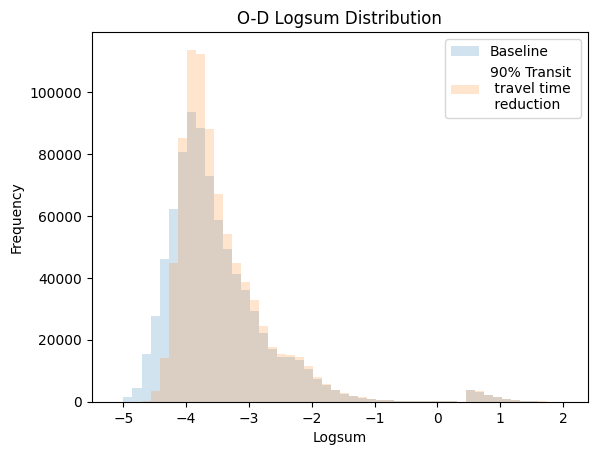

In [43]:
summary = pd.concat(t_list, axis = 1)
summary[['logsum_1', 'logsum_0.01']].plot.hist(alpha=0.2, bins = 50)
plt.title('O-D Logsum Distribution')
plt.xlabel('Logsum')
plt.legend(['Baseline', '90% Transit \n travel time \n reduction'])
plt.show()

In [44]:
summary.mean()

logsum_1      -3.499645
logsum_0.75   -3.498113
logsum_0.5    -3.495348
logsum_0.25   -3.488433
logsum_0.01   -3.400254
dtype: float64